 ## Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. 

В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

Цель проекта: проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
from scipy import stats as st


In [2]:
users = pd.read_csv(r'C:\Users\damos\OneDrive\Рабочий стол\Анализ данных\Проекты\Статистический анализ данных\users.csv')
calls = pd.read_csv(r'C:\Users\damos\OneDrive\Рабочий стол\Анализ данных\Проекты\Статистический анализ данных\calls.csv')
internet = pd.read_csv(r'C:\Users\damos\OneDrive\Рабочий стол\Анализ данных\Проекты\Статистический анализ данных\internet.csv')
messages = pd.read_csv(r'C:\Users\damos\OneDrive\Рабочий стол\Анализ данных\Проекты\Статистический анализ данных\messages.csv')
tariffs = pd.read_csv(r'C:\Users\damos\OneDrive\Рабочий стол\Анализ данных\Проекты\Статистический анализ данных\tariffs.csv')


Напишем функцию для обзора данных

In [3]:
def review(file):
    file.info()
    print()
    print('Количество дубликатов в файле:',file.duplicated().sum())
    print()
    print('Количество пропусков в файле:',file.isna().sum(), sep='\n')
    display(file.describe().T)

### Обзор данных по клиентам

In [4]:
review(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Количество дубликатов в файле: 0

Количество пропусков в файле:
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


Для данных в файле users.csv характерно следующее:
* в файле 500 строк
* тип данных во всех столбцах логически соответсвует значениям в ячейках, кроме столбцов churn_date и reg_date
* тип данных в столбцах  churn_date и reg_date возможно заменить на datetime
* в файле отсутствуют пропуски и дубликаты (пропуски в столбце churn_date говорят нам о том, что тариф ещё действовал на момент выгрузки данных)


### Обзор данных по звонкам

In [5]:
review(calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

Количество дубликатов в файле: 0

Количество пропусков в файле:
id           0
call_date    0
duration     0
user_id      0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


Для данных в файле calls.csv характерно следующее:
* в файле 202607 строк
* тип данных во всех столбцах логически соответсвует значениям в ячейках, кроме столбцов call_date и id 
* тип данных в стобце id можно привести к int64
* тип данных в столбце call_date возможно заменить на datetime
* в файле отсутствуют пропуски и дубликаты

### Обзор данных по интернету

In [6]:
review(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

Количество дубликатов в файле: 0

Количество пропусков в файле:
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500000,43127.054745,0.0,37348.7500,74697.500,112046.2500,149395.00
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


Построим гистрограмму для столбца mb_used	

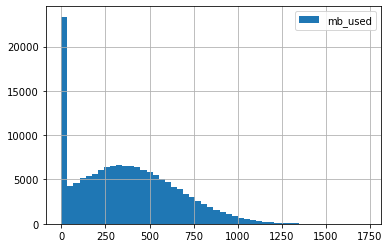

In [7]:
internet['mb_used'].hist(bins=50,legend = True);

Для данных в файле internet.csv характерно следующее:
* в файле 149396 строк
* тип данных во всех столбцах логически соответсвует значениям в ячейках, кроме столбцаов session_date и id 
* тип данных в стобце id можно привести к int64
* тип данных в столбце session_date возможно заменить на datetime
* в файле отсутствуют пропуски и дубликаты
* в файле присутсвует много нулевых значений - это может говорить о том, что в датасете есть сессии, когда пользователи не использовали интернет.  Считаю, что удалять эти данные не стоит, так как в таком случае у нас измениться описательная статистика. 

### Обзор данных по сообщениям

In [8]:
review(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

Количество дубликатов в файле: 0

Количество пропусков в файле:
id              0
message_date    0
user_id         0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


Для данных в файле messages.csv характерно следующее:
* в файле 123036 строк
* тип данных во всех столбцах логически соответсвует значениям в ячейках, кроме столбцаов message_date и id 
* тип данных в стобце id можно привести к int64
* тип данных в столбце message_date возможно заменить на datetime
* в файле отсутствуют пропуски и дубликаты

### Обзор данных по тарифам

In [9]:
review(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes

Количество дубликатов в файле: 0

Количество пропусков в файле:
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
rub_monthly_fee,2.0,1250.0,989.949494,550.0,900.0,1250.0,1600.0,1950.0
rub_per_gb,2.0,175.0,35.355339,150.0,162.5,175.0,187.5,200.0
rub_per_message,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0
rub_per_minute,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0


Для данных в файле tariffs.csv характерно следующее:
* в файле 2 строки
* тип данных во всех столбцах логически соответсвует значениям в ячейках
* в файле отсутствуют пропуски и дубликаты
* наименование в столбце tariff_name возможно поменять на tariff, чтобы было совпадение с наименованием столбца tariff в других файлах

## Шаг 2. Подготовьте данные

### Приведите данные к нужным типам;

Основываясь на полученных выводах при обзоре данных, изменим тип данных - даты к `datetime`, значения столбца `id` к `int`.

In [10]:
list_files = [users,users,calls,internet,messages]
list_columns = ['churn_date','reg_date','call_date','session_date','message_date']

for item in range(len(list_files)):
    list_files[item][list_columns[item]] = pd.to_datetime(list_files[item][list_columns[item]],format = '%Y-%m-%d')
    if item == 0 or item == 1:
        print(list_files[item][list_columns[item]].dtypes)
    elif item in (2,3,4):
        list_files[item]['id'] = list_files[item]['id'].astype('int')
        print(list_files[item]['id'].dtypes)
        print(list_files[item][list_columns[item]].dtypes)

datetime64[ns]
datetime64[ns]
int32
datetime64[ns]
int32
datetime64[ns]
int32
datetime64[ns]


Код возвращает только значения `datetime64[ns]` и `int64` из заданных столбцов, значит данные были приведены к нужным типам. 

### Найдите и исправьте ошибки в данных, если они есть.

`Примечание. «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.`

Значения в столбце `calls['duration']`  округлим в большую сторону.

In [11]:
calls['duration'] = np.ceil(calls['duration']).astype(int)

Перевод мегабайт в гигабайты по месяцам сделаем позже.

In [12]:
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included']/1024

Исправим наименование столбца tariff_name в файле tariffs в tariff.

In [13]:
tariffs = tariffs.rename(columns = {'tariff_name':'tariff'})

### Расчет дополнительных показателей 

<b> Расчет количественных показателей по месяцам:</b>

* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;

In [14]:
list_files = [calls,messages,internet]
list_columns = ['duration','id','mb_used']
list_columns_dates = ['call_date','message_date','session_date']
aggfunc_list = [['count','sum'],'count','sum']
names = [['user_id','month','calls_qty_monthly','minutes_used_monthly'],['user_id','month','messages_qty_monthly'],['user_id','month','mb_used_monthly']]
list_new_var = ['calls_month','messages_month','internet_month']

for item in range(len(list_files)):
    list_files[item]['month'] = list_files[item][list_columns_dates[item]].dt.month
    globals()[list_new_var[item]] = list_files[item].pivot_table(
        index = ['user_id','month'], values = list_columns[item], aggfunc = aggfunc_list[item] 
    ).reset_index()
    calls['duration'] = calls['duration'].apply(np.ceil).astype(int)
    globals()[list_new_var[item]].columns = names[item]
    display(globals()[list_new_var[item]].head(3))

,user_id,month,calls_qty_monthly,minutes_used_monthly
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340


,user_id,month,messages_qty_monthly
0,1000,5,22
1,1000,6,60
2,1000,7,75


,user_id,month,mb_used_monthly
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64


Переведем мегабайты в гигабайты с округлением в большую сторону

In [15]:
internet_month['gb_used_monthly'] = np.ceil((internet_month['mb_used_monthly']/1024)).astype('int')

<b>Расчет помесячной выручки с каждого пользователя </b> 
* вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;
* остаток умножьте на значение из тарифного плана;
* прибавьте абонентскую плату, соответствующую тарифному плану.

In [16]:
monthly_user_data = (
    calls_month.merge(messages_month, on = ['user_id','month'], how = 'outer' )
    .merge(internet_month, on = ['user_id','month'], how = 'outer')
    .merge(users, on = ['user_id'], how = 'inner')
    .merge(tariffs, on = ['tariff'], how = 'outer')
)

monthly_user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   calls_qty_monthly      3174 non-null   float64       
 3   minutes_used_monthly   3174 non-null   float64       
 4   messages_qty_monthly   2717 non-null   float64       
 5   mb_used_monthly        3203 non-null   float64       
 6   gb_used_monthly        3203 non-null   float64       
 7   age                    3214 non-null   int64         
 8   churn_date             187 non-null    datetime64[ns]
 9   city                   3214 non-null   object        
 10  first_name             3214 non-null   object        
 11  last_name              3214 non-null   object        
 12  reg_date               3214 non-null   datetime64[ns]
 13  tar

In [17]:
list_value = list(users['user_id'])
list_file = ['calls','internet','messages']

mismatch = []
missing_user_id = []

for value in range(len(list_value)):
    if list_value[value] not in (list(calls['user_id']) and list(internet['user_id']) and list(internet['user_id'])):
        missing_user_id.append(list_value[value])

for files in list_file:
    for user_id in missing_user_id:
        if user_id not in list(globals()[files]['user_id']):
            print(f'В файле {files} отсутствует значение {user_id}')

В файле calls отсутствует значение 1128
В файле calls отсутствует значение 1371
В файле internet отсутствует значение 1128
В файле internet отсутствует значение 1273
В файле internet отсутствует значение 1371
В файле messages отсутствует значение 1128
В файле messages отсутствует значение 1371


На этапе обзора даных из файлов было обнаружено отсутствие пропусков. Номера некоторых user_id не были включены в исходные файлы ввиду отсутствия расходования звонков, сообщений или интернета. Из за этого мы можем видить пропуски в новом датафрейме monthly_user_data. Заполним их нулями, нули будут свидтельствовать об отсутствии расхода по соответсвующему элементу тариффа.

In [18]:
monthly_user_data = monthly_user_data.fillna(
    {'calls_qty_monthly':0,
     'minutes_used_monthly':0,
     'messages_qty_monthly':0,
     'gb_used_monthly':0})

Теперь расчитаем экономические показатели

In [19]:
def revenue_tariff(row):
    messages_rev = (row['messages_qty_monthly']-row['messages_included'])*row['rub_per_message']
    calls_rev = (row['minutes_used_monthly']-row['minutes_included'])*row['rub_per_minute']
    internet_rev = (row['gb_used_monthly']-row['gb_per_month_included'])*row['rub_per_gb']
    revenue = row['rub_monthly_fee']
    for item in [messages_rev,calls_rev,internet_rev]:
        if item > 0:
            revenue += item
    return revenue

monthly_user_data['revenue_rub'] = monthly_user_data.apply(revenue_tariff,axis = 1)
monthly_user_data.head()


,user_id,month,calls_qty_monthly,minutes_used_monthly,messages_qty_monthly,mb_used_monthly,gb_used_monthly,age,churn_date,city,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,revenue_rub
0,1000,5,22.0,159.0,22.0,2253.49,3.0,52,NaT,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,23.0,52,NaT,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,14.0,52,NaT,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,14.0,52,NaT,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,15.0,52,NaT,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0


## Шаг 3. Проанализируйте данные

### Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

Данные кол-ву минут разговора, сообщений и объёму интернет-трафика приведены ниже. 

In [20]:
tariff_monthly_data = monthly_user_data.pivot_table(
    index = ['tariff','month'],
    values = ['minutes_used_monthly','messages_qty_monthly','gb_used_monthly','revenue_rub','user_id'],
    aggfunc = {'minutes_used_monthly':'sum',
               'messages_qty_monthly':'sum',
               'gb_used_monthly':'sum',
               'revenue_rub':'sum',
               'user_id':'count'}
).reset_index()
tariff_monthly_data.set_index('month', inplace=True)
ultra = tariff_monthly_data.query('tariff == "ultra"')
smart = tariff_monthly_data.query('tariff == "smart"')

display(smart.head())
ultra.tail()

,tariff,gb_used_monthly,messages_qty_monthly,minutes_used_monthly,revenue_rub,user_id
month,,,,,,
1,smart,297.0,620.0,6931.0,24525.0,34
2,smart,687.0,1397.0,17324.0,48001.0,58
3,smart,1173.0,2453.0,30034.0,89676.0,77
4,smart,1526.0,3443.0,41119.0,107866.0,112
5,smart,2243.0,4762.0,54618.0,168849.0,141


,tariff,gb_used_monthly,messages_qty_monthly,minutes_used_monthly,revenue_rub,user_id
month,,,,,,
8,ultra,2097.0,5183.0,54653.0,222900.0,107
9,ultra,2213.0,6013.0,62036.0,232800.0,115
10,ultra,2468.0,7187.0,68644.0,254100.0,123
11,ultra,2654.0,7476.0,72545.0,280350.0,134
12,ultra,3022.0,8425.0,82400.0,297300.0,139


In [21]:
def tariff_monthly_graph(tariff,column):
    graph = tariff_monthly_data[tariff_monthly_data['tariff']== tariff][column]\
    .plot(
    y=column,x = 'month',legend = True, label = tariff ,
    title = f'График по столбцу {column} для обоих тарифов',
    grid = True
    )
    return graph

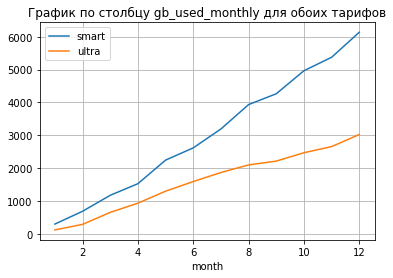

In [22]:
tariff_monthly_graph('smart','gb_used_monthly')
tariff_monthly_graph('ultra','gb_used_monthly');

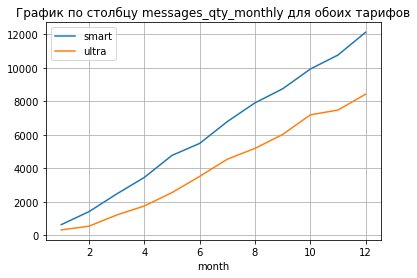

In [23]:
tariff_monthly_graph('smart','messages_qty_monthly')
tariff_monthly_graph('ultra','messages_qty_monthly');

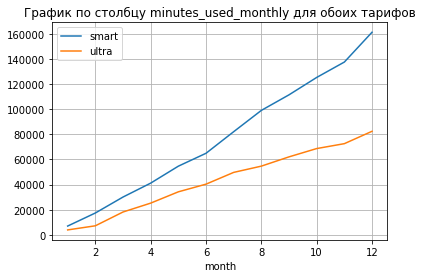

In [24]:
tariff_monthly_graph('smart','minutes_used_monthly')
tariff_monthly_graph('ultra','minutes_used_monthly');

<b> Вывод: </b>

По обоим тарифам есть тренд увелечения всех трех компонентов тарифа в количественном объеме. Возможно это связано с увелечением кол-ва пользоватлей, проверим это позже. 


### Посчитайте среднее количество, дисперсию и стандартное отклонение. 

Напишем функцию для построения гистограмм. Для данных по интернету и минутам построим гистограммы плотности, так как эти переменные являются непрерывными, а для данных по кол-ву сообщений построим обычную гистограмму, так как переменная дискретная.

In [25]:
def histogram(tariff,column):
    if column == 'gb_used_monthly' or column ==  'minutes_used_monthly':
        return plt.title(f'Гистограмма плотности для тарифа {tariff}, по столбцу {column}'), \
    plt.hist(
            x=monthly_user_data[monthly_user_data['tariff']==tariff][column], 
            bins = 20, density=True
        );
    elif column == 'messages_qty_monthly' or column  == 'revenue_rub':
        return plt.title(f'Гистограмма для тарифа {tariff}, по столбцу {column}'), \
    plt.hist(
            x=monthly_user_data[monthly_user_data['tariff']==tariff][column], 
            bins = 20
        ) 

<b> Данные по расходу интернета </b>

In [26]:
monthly_user_data.groupby('tariff').agg({'gb_used_monthly':['mean','var','std']}).round(2)

gb_used_monthly             
                  mean    var   std
tariff                             
smart            16.33  33.03  5.75
ultra            19.49  97.09  9.85

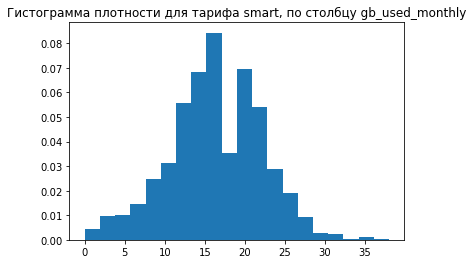

In [27]:
histogram('smart','gb_used_monthly');

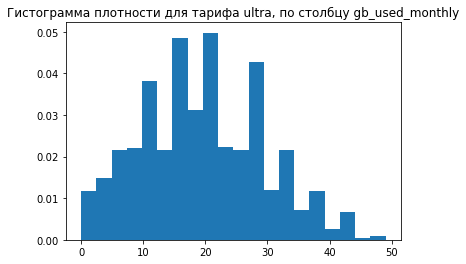

In [28]:
histogram('ultra','gb_used_monthly');

<b> Вывод: </b> 

Распределние по расходу интернета для двух тарифов отличается, так для тарифа smart среднее потребление интернета меньше, чем у тарифа ultra - 16.3 против 19.5 . Разброс значений у тарифа ultra больше в два раза. Это говорит о том, расход интернета у клиентов тарифа smart сгруппирован плотнее вокргуг среднего, нежели у пользователей тарифа ultra. Также в среднем пользователи тарифа smart полностью расходуют лимит тарифа, в то время как у тарифа ultra пользователи расходуют в срднем 64% своего лимита.

In [29]:
# отношение среднего к лимиту тарифа
smart_mean_share = 16.33/15
ultra_mean_share = 19.49/30
display (smart_mean_share,ultra_mean_share )

1.0886666666666664

0.6496666666666666

<b> Данные по расходу сообщений </b>

In [30]:
monthly_user_data.groupby('tariff').agg({'messages_qty_monthly':['mean','var','std']}).round(2)

messages_qty_monthly                
                       mean      var    std
tariff                                     
smart                 33.38   796.81  28.23
ultra                 49.36  2285.27  47.80

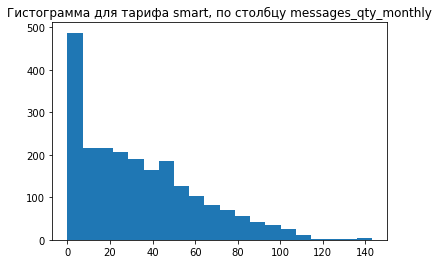

In [31]:
histogram('smart','messages_qty_monthly');

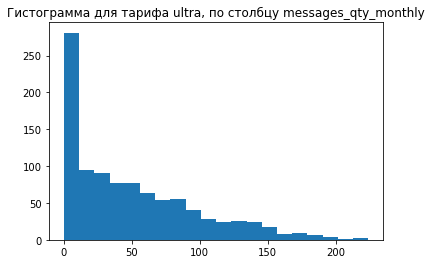

In [32]:
histogram('ultra','messages_qty_monthly');

<b> Вывод: </b> 
    
На обеих гистограммах мы видим выбросы около нуля, что означает отсутсвие отправлений сообщений.
Как и на предыдущих гистограммах мы видим, что у пользователей тарифа ultra и среднее и стандартное отклонение больше. Но количество пользователей у тарифа смарт больше. Лимит сообщений пользователи тарифа smart расходуют в среднем на 66%, а в тарифе ultra всего лишь 4%

In [33]:
# отношение среднего к лимиту тарифа
smart_mean_share = 33.38/50
ultra_mean_share = 49.36/1000
display (smart_mean_share,ultra_mean_share )

0.6676000000000001

0.04936

<b> Данные по расходу минут для разговоров </b>

In [34]:
monthly_user_data.groupby('tariff').agg({'minutes_used_monthly':['mean','var','std']}).round(2)

minutes_used_monthly                   
                       mean        var     std
tariff                                        
smart                417.93   36219.32  190.31
ultra                526.62  100873.63  317.61

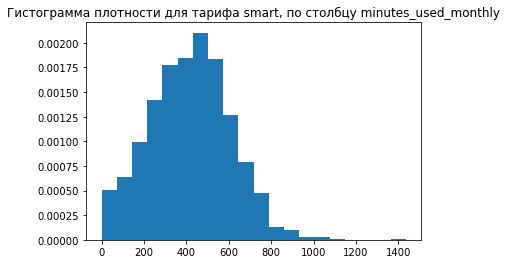

In [35]:
histogram('smart','minutes_used_monthly');

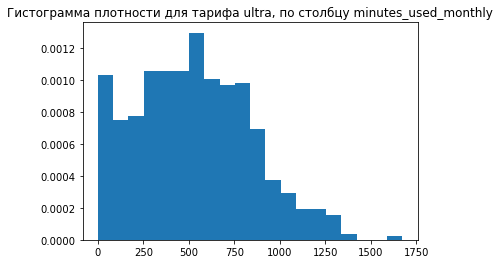

In [36]:
histogram('ultra','minutes_used_monthly');

<b> Вывод: </b> 

Как и на предыдущих гистограммах мы видим, что у пользователей тарифа ultra и среднее и стандартное отклонение больше. Но при этом разница в средних небольшая, а разница в средних значительна. Распредления близки к нормальным. Пользователи  тарифа smart в среднем используют практические весь лимит , в то время как пользователи тарифа ultra используют лишь 17%.



In [37]:
# отношение среднего к лимиту тарифа
smart_mean_share = 417.9/500 
ultra_mean_share = 526.62/ 3000
display (smart_mean_share,ultra_mean_share )

0.8358

0.17554

### Анализ финансовых показателей

Напишем функцию для создания графиков

In [38]:
def linear_graph(tariff,column):
    if column == 'revenue_rub' or column == 'excess_rub':
        graph = monthly_user_data[monthly_user_data['tariff']== tariff]\
        .groupby('month')[column].agg('sum').plot(
            y=column,x = 'month',legend = True, label = tariff,
            title = f'График по столбцу {column}, по обоим тарифам по месяцам',
            grid = True
        )
        return graph
    elif column == 'user_id':
        graph = monthly_user_data[monthly_user_data['tariff']== tariff]\
        .groupby('month')[column].agg('count').plot(
            y=column,x = 'month',legend = True, label = tariff,
            title = f'График по столбцу {column}, по обоим тарифам по месяцам',
            grid = True
        )
        return graph
        
    

#### Проанализируем переплату пользователей по обоим трафиикам по месяцам

In [39]:
def excess_tariff(row):
    messages_rev = (row['messages_qty_monthly']-row['messages_included'])*row['rub_per_message']
    calls_rev = (row['minutes_used_monthly']-row['minutes_included'])*row['rub_per_minute']
    internet_rev = (row['gb_used_monthly']-row['gb_per_month_included'])*row['rub_per_gb']
    excess = 0
    for item in [messages_rev,calls_rev,internet_rev]:
        if item > 0:
            excess += item
    return excess

monthly_user_data['excess_rub'] = monthly_user_data.apply(excess_tariff,axis = 1)
                                
monthly_user_data.groupby('tariff').agg({'excess_rub':['mean','var','std']}).round(2)

excess_rub                   
             mean        var     std
tariff                              
smart      739.97  669785.71  818.40
ultra      120.15  141516.75  376.19

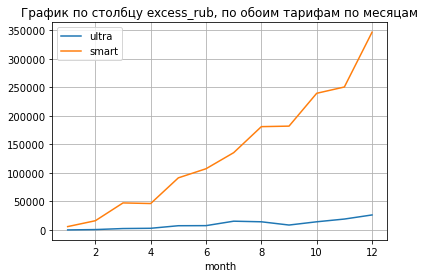

In [40]:
linear_graph('ultra','excess_rub')
linear_graph('smart','excess_rub');

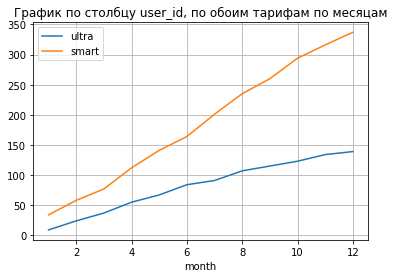

In [41]:
linear_graph('ultra','user_id')
linear_graph('smart','user_id');

<b> Вывод: </b> 

Можем видеть, что суммарно переплата у пользователей тарифа smart больше и она растет месяц к месяцу, но это может быть связано с ростом пользователей, при этом у пользоватлей тарифа ultra рост переплат с течением времени незначителен при одновременном увелечении кол-ва пользователей.

Средняя переплата и ст. отклонение у пользователей тарифа smart значительно выше, чем у тарифа у пользователей ultra

#### Проанализируем выручки пользователей по обоим трафиикам по месяцам

In [42]:
monthly_user_data.groupby('tariff').agg({'revenue_rub':['mean','var','std']}).round(2)

revenue_rub                   
              mean        var     std
tariff                               
smart      1289.97  669785.71  818.40
ultra      2070.15  141516.75  376.19

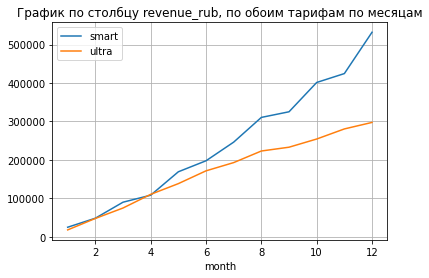

In [43]:
linear_graph('smart','revenue_rub')
linear_graph('ultra','revenue_rub');

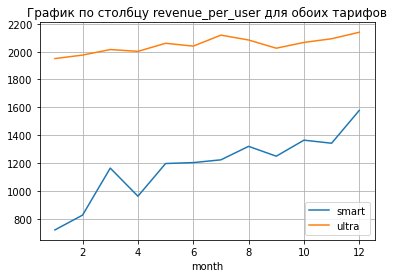

In [44]:
tariff_monthly_data['revenue_per_user'] = tariff_monthly_data['revenue_rub']/tariff_monthly_data['user_id']
tariff_monthly_graph('smart','revenue_per_user')
tariff_monthly_graph('ultra','revenue_per_user');

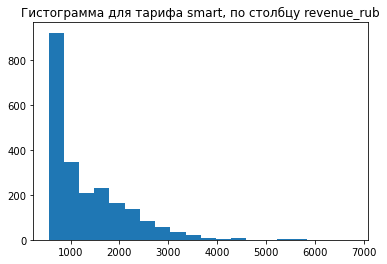

In [45]:
histogram('smart','revenue_rub');

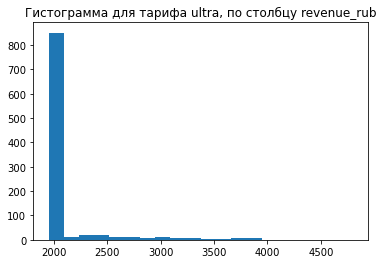

In [46]:
histogram('ultra','revenue_rub');

<b> Вывод: </b> 

Суммарно пользователи тарифа smart приносят больше выручки, чем пользователи тарифа ultra. Распределение выручки выглядит следующим образом - в среднем выручка по тарифу ultra почти в два раза больше средней выручки по второму тарифу, и ст. отклонение практически в 3 раза меньше, чем у тарифа smart.  По тарифу ультра есть незначительный рост по показателю средняя выручка на одного клиента в месяц, в то время как у тарифа смарт динамика роста больше, что коррелирует с ростом числа пользоватлей.

## Шаг 4. Проверьте гипотезы

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.

Поясните:

* как вы формулировали нулевую и альтернативную гипотезы;
* какой критерий использовали для проверки гипотез и почему.

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

Для проверки этой гипотезы сформулируем нулевую и альтернативную гипотезы

H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны

H1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различны

Используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборка, с учетом, что дисперсии скорее всего будут разными.

In [47]:
alpha = 0.05

sample_1 = monthly_user_data[monthly_user_data['tariff']== 'smart']['revenue_rub']

sample_2 = monthly_user_data[monthly_user_data['tariff']== 'ultra']['revenue_rub']

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var=False
)

print('pvalue:',results.pvalue)

if results.pvalue > alpha:
    print("Не отвергаем нулевую гипотезу")
elif results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")

pvalue: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


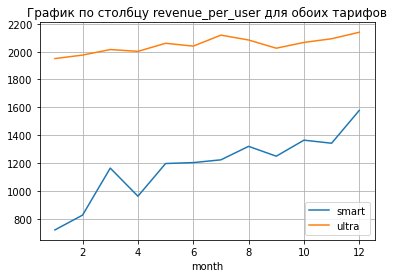

In [48]:
tariff_monthly_graph('smart','revenue_per_user')
tariff_monthly_graph('ultra','revenue_per_user');

<b> Вывод: </b>

P-value при проведении статистического теста оказался меньше уровня статистической значимости, поэтому мы отвергаем нулевую гипотезу, но не отвергаем альтернативную - средняя выручка пользователей тарифов «Ультра» и «Смарт» различны

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для проверки этой гипотезы сформулируем нулевую и альтернативную гипотезы

H0 - Cредняя выручка пользователей из Москвы и средняя выручек пользователей из других регионов равны

H1 - Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборка, с учетом, что дисперсии скорее всего будут разными.

In [49]:
alpha = 0.05

sample_1 = monthly_user_data[monthly_user_data['city']== 'Москва']['revenue_rub']

sample_2 = monthly_user_data[monthly_user_data['city']!= 'Москва']['revenue_rub']

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var=False
)

print('pvalue:',results.pvalue)

if results.pvalue > alpha:
    print("Не отвергаем нулевую гипотезу")
elif results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")

pvalue: 0.5257376663729298
Не отвергаем нулевую гипотезу


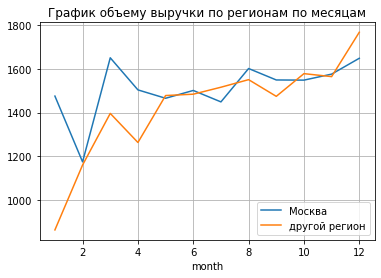

In [50]:
def region_func(row):
    if row['city'] == 'Москва':
        return 'Москва'
    else:
        return'другой регион'
    
monthly_user_data['region'] = monthly_user_data.apply(region_func,axis = 1)    
    
region_data = monthly_user_data.pivot_table(
    index = ['region','month'],
    values = 'revenue_rub',
    aggfunc = 'mean'
).reset_index().set_index('month')
region_data 
def region_graph(region,column):
    graph = region_data[region_data['region']== region][column]\
    .plot(
    y=column,x = 'month',legend = True, label = region ,
    title = f'График объему выручки по регионам по месяцам',
    grid = True
    )
    return graph
region_graph('Москва','revenue_rub')
region_graph('другой регион','revenue_rub');

<b> Вывод: </b>

P-value при проведении статистического теста оказался больше уровня статистической значимости, поэтому мы отвергаем альтернативную гипотезу, и у нас нет оснований отвергнуть нулевую -  средняя выручка пользователей из Москвы и средняя выручек пользователей из других регионов равны

### Пояснения

Нулевые гипотезы формулировались путем предложения о равенстве средних, альтернативные гипотезы формулировались путем создания проииворечия нулевой гипотезе.

Критерием проверки является сравнение p-значения с уровнем статистической значимости (альфа)

## Шаг 5. Напишите общий вывод

* При первичном анализе данных были обнаружены некоторые особенности - тип некоторых данных необходимо было изменить, исправить ошибки, что впоследствии и было сделано.
* Были расчитаны дополнительные показатели помесячно и выручка по каждому пользователю.
* Выводы по расходу интернета:
 * Распределние по расходу интернета для двух тарифов отличается, так для тарифа smart среднее потребление интернета меньше, чем у тарифа ultra - 16.3 против 19.5 . Разброс значений у тарифа ultra больше в два раза. Это говорит о том, расход интернета у клиентов тарифа smart сгруппирован плотнее вокргуг среднего, нежели у пользователей тарифа ultra. Также в среднем пользователи тарифа smart полностью расходуют лимит тарифа, в то время как у тарифа ultra пользователи расходуют в срднем 64% своего лимита
* Выводы по по расходу сообщений
 *  у пользователей тарифа ultra и среднее и стандартное отклонение больше. Но количество пользователей у тарифа смарт больше. Лимит сообщений пользователи тарифа smart расходуют в среднем на 66%, а в тарифе ultra всего лишь 4%
* Выводы по расходу минут для разговоров
 * у пользователей тарифа ultra и среднее и стандартное отклонение больше. Но при этом разница в средних небольшая, а разница в средних значительна. Распредления близки к нормальным. Пользователи тарифа smart в среднем используют практические весь лимит , в то время как пользователи тарифа ultra используют лишь 17%
* Была проанализирована переплата пользователей:
 * суммарно переплата у пользователей тарифа smart больше и она растет месяц к месяцу, но это может быть связано с ростом пользователей, при этом у пользоватлей тарифа ultra рост переплат с течением времени незначителен при одновременном увелечении кол-ва пользователей.Средняя переплата и ст. отклонение у пользователей тарифа smart значительно выше, чем у тарифа у пользователей ultra
* Была проанализирована выручка: 
 * суммарно пользователи тарифа smart приносят больше выручки, чем пользователи тарифа ultra. Распределение выручки выглядит следующим образом - в среднем выручка по тарифу ultra почти в два раза больше средней выручки по второму тарифу, и ст. отклонение практически в 3 раза меньше, чем у тарифа smart. По тарифу ультра есть незначительный рост по показателю средняя выручка на одного клиента в месяц, в то время как у тарифа смарт динамика роста больше, что коррелирует с ростом числа пользоватлей.
* Также были проверны гипотезы и выбраны среди них следующие:
 * средняя выручка пользователей тарифов «Ультра» и «Смарт» различны
 * средняя выручка пользователей из Москвы и средняя выручек пользователей из других регионов равны
* Исходя из проведенного анализа можно сказать, что у тарифа смарт необходимо увеличить лимиты и стоимость тарифа - мы видим, что клиенты на этом тарифе готовы переплачивать за дополнительный траффик и выходят за рамки стоимости своего тарифа, то есть спрос на более широкие лимиты, по тарифу ультра можно урезать лимит на некоторые позиции - например по сообщениям, так как в среднем он использвуется лишь на 4 %, средняя выруска по данному тарифу почти в два раза больше чем у тарифа смарт, считаю что увелечение количества пользователей по данному тарифу в том числе путем маркетинговых компаний, может стать выгодным для «Мегалайна» .